In [12]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [13]:
vac = pd.DataFrame(requests.get('https://api.hh.ru/vacancies?area=1&text=преподаватель+английского+языка&per_page=100').json()['items'])

In [14]:
corpus = [x['requirement'] for x in vac.snippet.fillna('').values]
vectorizer = TfidfVectorizer()
dff = pd.DataFrame(vectorizer.fit_transform(corpus).toarray(), columns = vectorizer.get_feature_names_out())

In [15]:
# Применим метод главных компонент
pca = PCA(n_components=2)
comp = pca.fit_transform(dff)

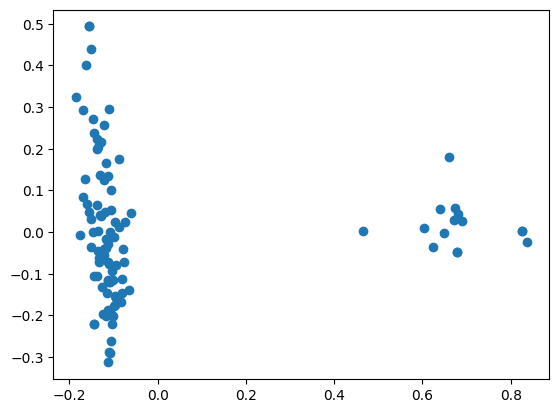

In [16]:
plt.scatter(comp[:, 0], comp[:, 1])

In [18]:
pca.n_components_
pca.components_
pca.components_.shape

(2, 690)